2025-08-21 05:23:38.091097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755753818.273847      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755753818.327844      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1755753910.682605      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/5


I0000 00:00:1755753914.827062      97 service.cc:148] XLA service 0x7a308400b150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755753914.827705      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755753915.111581      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


 19/131 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5603 - loss: 0.9533

I0000 00:00:1755753917.589431      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.7743 - loss: 0.4910 - val_accuracy: 0.9358 - val_loss: 0.1656
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9452 - loss: 0.1475 - val_accuracy: 0.9607 - val_loss: 0.1054
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9625 - loss: 0.0919 - val_accuracy: 0.9598 - val_loss: 0.1222
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9693 - loss: 0.0859 - val_accuracy: 0.9626 - val_loss: 0.1163
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9756 - loss: 0.0676 - val_accuracy: 0.9703 - val_loss: 0.0854


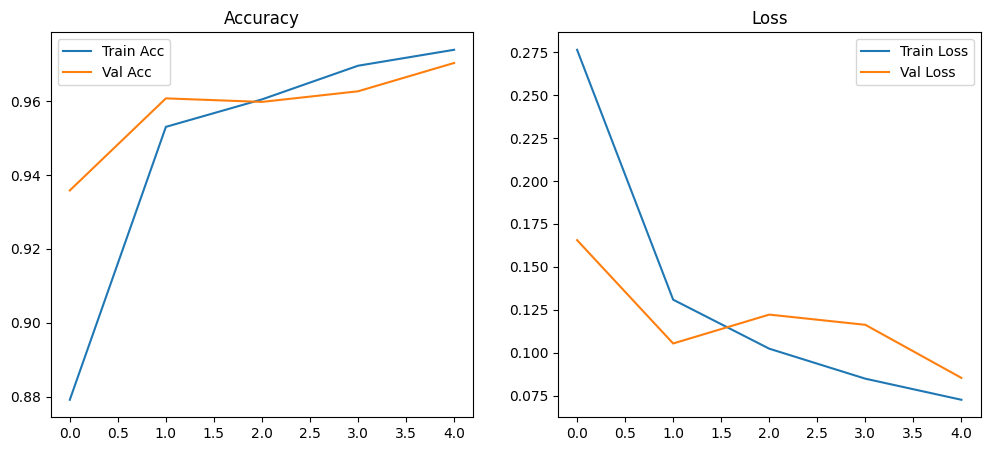

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
✅ Accuracy: 0.9703065134099617
✅ F1 Score: 0.9800899165061016

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       268
           1       0.98      0.98      0.98       776

    accuracy                           0.97      1044
   macro avg       0.96      0.96      0.96      1044
weighted avg       0.97      0.97      0.97      1044



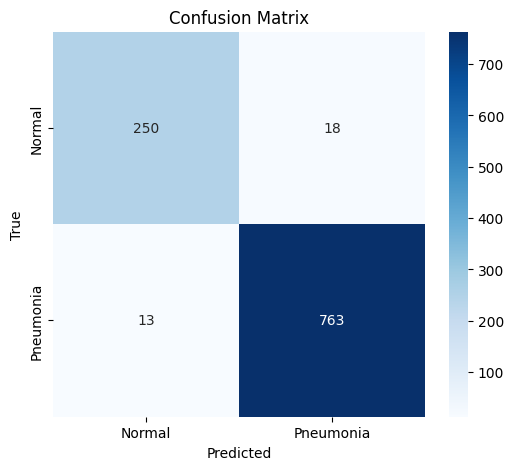

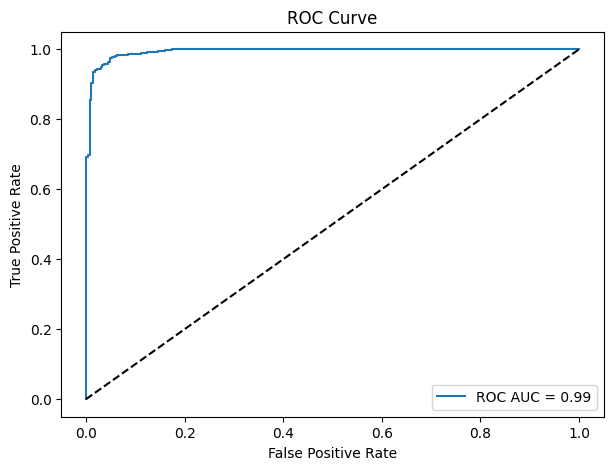

✅ Correct Predictions:


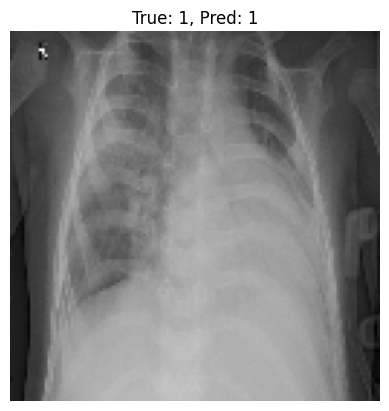

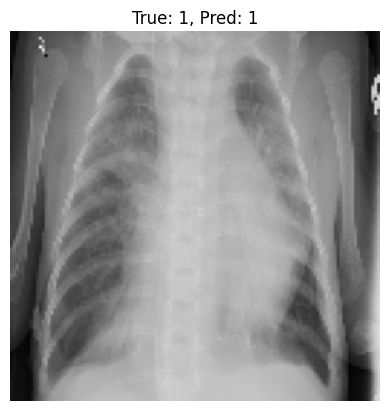

❌ Incorrect Predictions:


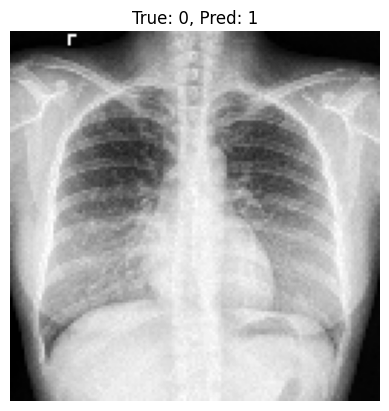

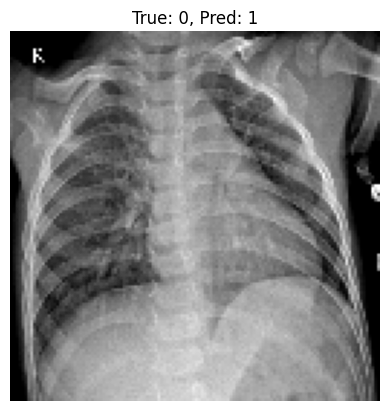

In [1]:
# 📦 Import Libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# 📁 Path
base_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'

def load_images_from_folder(folder_path, label, img_size=(128, 128), max_images=None):
    images = []
    labels = []
    for i, filename in enumerate(os.listdir(folder_path)):
        if max_images and i >= max_images:
            break
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img.astype(np.float32) / 255.0
            images.append(img)
            labels.append(label)
    return images, labels

# ⚡ Load Training Data
train_normal_dir = os.path.join(base_dir, 'train/NORMAL')
train_pneumonia_dir = os.path.join(base_dir, 'train/PNEUMONIA')

X_normal, y_normal = load_images_from_folder(train_normal_dir, 0, max_images=4000)
X_pneumonia, y_pneumonia = load_images_from_folder(train_pneumonia_dir, 1, max_images=4000)

X = np.array(X_normal + X_pneumonia)
y = np.array(y_normal + y_pneumonia)

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 🏗 Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🧑‍🏫 Train Model
history = model.fit(X_train.reshape(-1, 128, 128, 1), y_train,
                    validation_data=(X_test.reshape(-1, 128, 128, 1), y_test),
                    epochs=5, batch_size=32)

# 📈 Plot Training History
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

# 🧪 Evaluate
y_pred_probs = model.predict(X_test.reshape(-1, 128, 128, 1)).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 📉 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 🖼 Sample Predictions
def show_predictions(X, y_true, y_pred, shape=(128,128), n=2):
    correct = np.where(y_true == y_pred)[0][:n]
    incorrect = np.where(y_true != y_pred)[0][:n]
    print("✅ Correct Predictions:")
    for idx in correct:
        plt.imshow(X[idx], cmap='gray')
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')
        plt.show()
    print("❌ Incorrect Predictions:")
    for idx in incorrect:
        plt.imshow(X[idx], cmap='gray')
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')
        plt.show()

show_predictions(X_test, y_test, y_pred, n=2)

# 📸 Predict on Custom Image
def predict_custom_image(image_path, model, img_size=(128, 128)):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("Image not readable")

        img = cv2.resize(img, img_size)
        img = img.astype(np.float32) / 255.0
        input_img = img.reshape(1, img_size[0], img_size[1], 1)

        prob = model.predict(input_img)[0][0]
        prediction = "Pneumonia" if prob > 0.5 else "Normal"

        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction: {prediction}\nConfidence: {prob:.2f}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"❌ Error processing image: {e}")